# Project 1 : Investigating the TMDb Movie Data




## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# 

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb), over a period of approximately **fifty-five (~55) years**. Accessed from  [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True).

The data set includes the following columns :- 

1. id - Input ID 
2. imdb_id	- ID on IMDb online database
3. popularity - User rating for movie for period
4. budget - Movie budget at the time of release
5. revenue - Movie revenue based on ticket sales and view subscriptions for duration
6. original_title - Title of movie at time of release	
7. cast - List of Staring actors/actresses
8. homepage - Movie's website
9. director - Movie's director
10. tagline - Popular taglines or phrases associated with movie
11. keywords - Significant words associated with movie 
12. overview - Movie's summary
13. runtime - Movie's duration
14. genres - Movie's category of work
15. production_companies - Companies or Entities involved movie's creation and availability
16. release_date - when movie was made available for consumption	
17. vote_count - Votes per users
18. vote_average - Average number of votes
19. release_year - Year of movie's release	
20. budget_adj - Budget adjusted for inflation
21. revenue_adj - Revenue adjusted for inflation

NB. ;

● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.

● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.


### Question(s) for Analysis : 

>**1. Was the most prolific director of the period necessarily the most bankable for the production companies?**

> **2. Did the year with the most movies released also have the most watched movie, or the most profitable movie made for the period?**



# 

# 

<a id='wrangling'></a>
## Data Wrangling 




### General Section



In [1]:
# Importing library and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
# Dataset overview and information

df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.shape

(10866, 21)

# 

# 

### Data Cleaning

 

In [5]:
# Trimming data frame by removing some columns not needed for analysis

df.drop(df.columns[[0, 1, 6, 7, 9, 10, 11, 19, 20]], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1018.8+ KB


In [7]:
# Checking for missing data

df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [10]:
# Checking for duplicates

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 9807, dtype: bool

In [11]:
df.duplicated().sum()

1

In [12]:
# Dropping duplicated rows

df.drop_duplicates(inplace=True)
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [13]:
df.duplicated().sum()

0

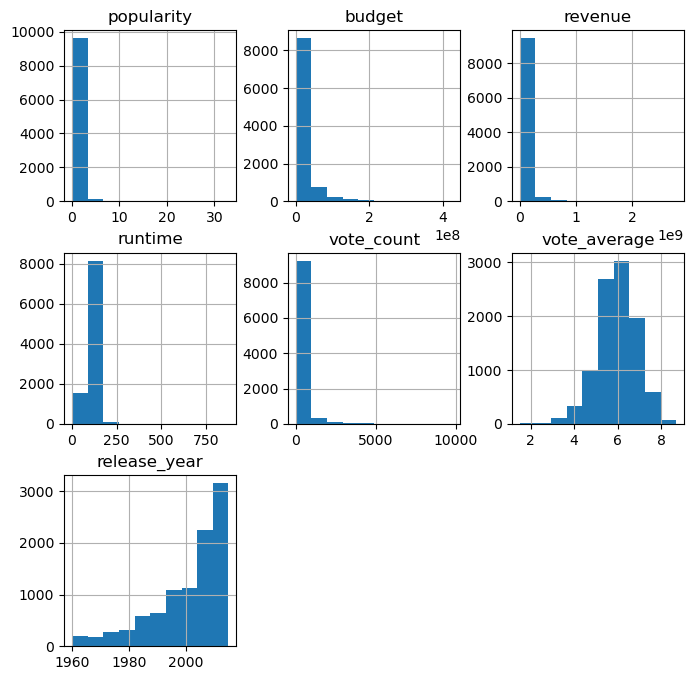

In [14]:
# Visualization of dataset

df.hist(figsize=(8,8));

In [15]:
# Inspecting data types

df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [16]:
# Fixing data types

df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9806 non-null   float64       
 1   budget                9806 non-null   int64         
 2   revenue               9806 non-null   int64         
 3   original_title        9806 non-null   object        
 4   director              9806 non-null   object        
 5   runtime               9806 non-null   int64         
 6   genres                9806 non-null   object        
 7   production_companies  9806 non-null   object        
 8   release_date          9806 non-null   datetime64[ns]
 9   vote_count            9806 non-null   int64         
 10  vote_average          9806 non-null   float64       
 11  release_year          9806 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 995.9+ 

In [17]:
df.head(2)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


# 

# 

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1 : Was the most prolific director of the period necessarily the most bankable for the production companies?




In [18]:
# Creating 'profit' column to show income made from revenues after initial investments recouped by production companies

df['profit']= df['revenue']-df['budget']
df

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0
10862,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0
10863,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0


In [19]:
# Function to determine the yearly production amount

def prod_investment(amount):
    results = df.groupby('release_year')[amount].sum().sort_values(ascending=False)
    return results.iloc[0:10]

In [20]:
# Total profit per each year

yearly_profit = prod_investment('profit')
yearly_profit

release_year
2015    19167976513
2014    16421295829
2012    16375938392
2013    15497173550
2011    14712131111
2009    13624390791
2010    12623814125
2007    11809903057
2008    11584053136
2004     9676381129
Name: profit, dtype: int64

In [21]:
# Total production budget per each year

yearly_budget = prod_investment('budget')
yearly_budget

release_year
2010    9331845996
2013    9203619761
2011    8976589239
2009    8550794364
2012    8257783942
2014    7908350738
2008    7714912597
2007    7593852112
2015    7591947557
2005    7294284349
Name: budget, dtype: int64

In [22]:
# Number of years in dataframe

len(df.groupby('release_year')['budget'].sum())

56

In [23]:
# Determining the movie count per director

movie_count_d = df.groupby('director')['original_title'].count().sort_values(ascending=False)
movie_count_d

director
Woody Allen                                       42
Clint Eastwood                                    34
Steven Spielberg                                  29
Martin Scorsese                                   26
Ridley Scott                                      23
                                                  ..
James Sbardellati|Peter Merwin|Bart Freundlich     1
James Signorelli                                   1
James T. Walker                                    1
James Tucker                                       1
Ã€lex Pastor|David Pastor                          1
Name: original_title, Length: 4521, dtype: int64

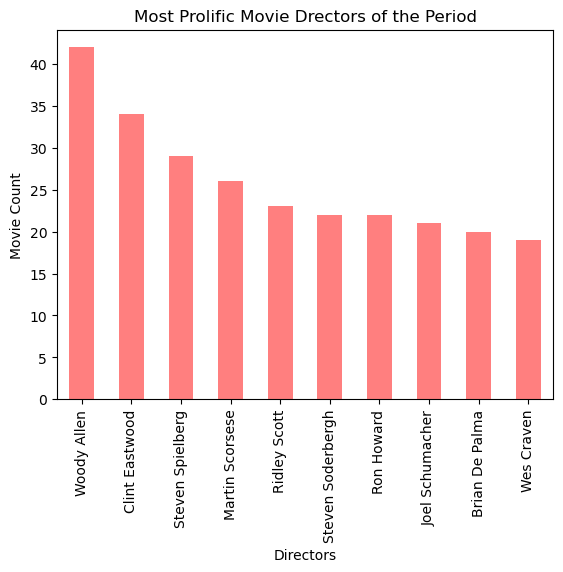

In [24]:
# Creating bar chart to represent results from previous inquiry

movie_count_d[: 10]
movie_count_d[: 10].plot(kind='bar',alpha=0.5, color= 'red')

plt.title('Most Prolific Movie Drectors of the Period')
plt.xlabel('Directors')
plt.ylabel('Movie Count');

### The above chart indicates which directors has amassed a large body of work over the period, in ascending order, have amassed.

# 

# 

In [25]:
# Determinig the most profitable movie directors of the period

movie_count_d_profit = df.groupby('director')['profit'].sum().sort_values(ascending=False)
movie_count_d_profit

director
Steven Spielberg                                                                7428613772
Peter Jackson                                                                   5196468949
James Cameron                                                                   5081849077
Michael Bay                                                                     3557208171
David Yates                                                                     3379295625
                                                                                   ...    
Richard Rich                                                                    -108228342
Roland JoffÃ©                                                                   -115288558
Jeremy Podeswa|Tim Van Patten|David Nutter|Graham Yost|Carl Franklin|Tony To    -120000000
Uwe Boll                                                                        -153333591
Sngmoo Lee                                                                      -

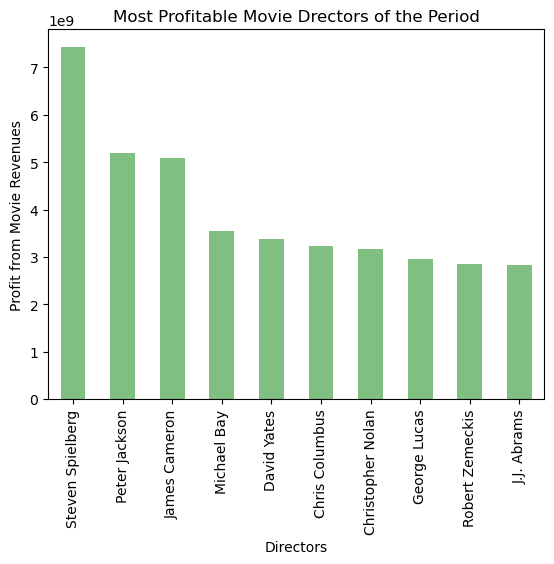

In [26]:
# Creating bar chart to represent results from previous inquiry

movie_count_d_profit[: 10]
movie_count_d_profit[: 10].plot(kind='bar',alpha=0.5, color= 'green')

plt.title('Most Profitable Movie Drectors of the Period')
plt.xlabel('Directors')
plt.ylabel('Profit from Movie Revenues');

### The above chart indicates which directors, per the number of movies made, in ascending order, have amassed profits from their works.

# 

# 

### Question 2 : Did the year with the most movies released also have the most watched movie, or the most profitable movie made for the period?




In [27]:
# Year with the most movies produced
# Assessing movie count per year

movie_count_yr = df.groupby('release_year')['original_title'].count().sort_values(ascending=False)
movie_count_yr

release_year
2014    638
2013    568
2015    561
2012    500
2009    474
2011    461
2008    443
2010    421
2007    392
2006    353
2005    324
2003    254
2004    253
2002    243
2001    212
1999    212
2000    197
1996    196
1998    191
1997    180
1994    174
1993    172
1995    170
1988    133
1989    129
1992    127
1990    126
1991    125
1987    114
1986    110
1985    106
1984    100
1982     80
1981     78
1983     77
1980     73
1978     61
1979     56
1971     55
1973     55
1977     55
1976     46
1974     44
1966     44
1975     42
1964     41
1970     40
1972     37
1968     37
1967     37
1965     34
1963     34
1960     32
1961     30
1962     30
1969     29
Name: original_title, dtype: int64

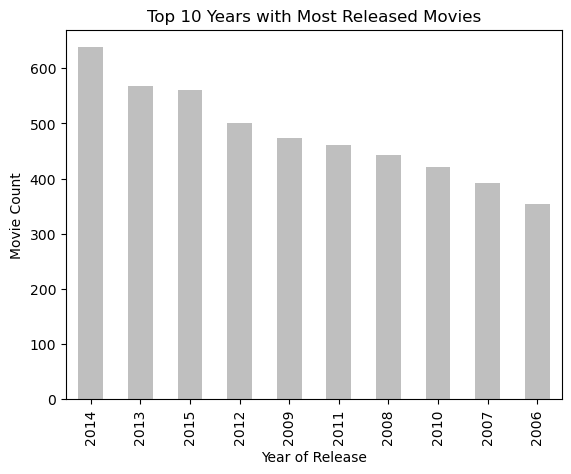

In [28]:
# Creating bar chart to represent results from previous inquiry

movie_count_yr.iloc[: 10]
movie_count_yr.iloc[: 10].plot(kind='bar',alpha=0.5, color= 'gray')

plt.title('Top 10 Years with Most Released Movies')
plt.xlabel('Year of Release')
plt.ylabel('Movie Count');

### The above chart shows by years, in ascending order,the particular number of movies released.

# 

In [29]:
# Top 10 movies with highest watch count for the period

most_watched_movie = df[['original_title', 'popularity', 'revenue', 'release_year']]
most_watched_movie.sort_values(by=['revenue', 'popularity'], ascending=False).iloc[:10]

,original_title,popularity,revenue,release_year
1386,Avatar,9.432768,2781505847,2009
3,Star Wars: The Force Awakens,11.173104,2068178225,2015
5231,Titanic,4.355219,1845034188,1997
4361,The Avengers,7.637767,1519557910,2012
0,Jurassic World,32.985763,1513528810,2015
4,Furious 7,9.335014,1506249360,2015
14,Avengers: Age of Ultron,5.944927,1405035767,2015
3374,Harry Potter and the Deathly Hallows: Part 2,5.711315,1327817822,2011
5422,Frozen,6.112766,1274219009,2013
5425,Iron Man 3,4.946136,1215439994,2013


In [30]:
# Top 10 perfoming movies in terms of profit income and ticket sales (revenue) for the period

best_performing_movie = df[['original_title', 'profit', 'revenue', 'release_year']]
best_performing_movie.sort_values(by=['profit', 'revenue', 'release_year'], ascending=False).iloc[: 10]

,original_title,profit,revenue,release_year
1386,Avatar,2544505847,2781505847,2009
3,Star Wars: The Force Awakens,1868178225,2068178225,2015
5231,Titanic,1645034188,1845034188,1997
0,Jurassic World,1363528810,1513528810,2015
4,Furious 7,1316249360,1506249360,2015
4361,The Avengers,1299557910,1519557910,2012
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822,1327817822,2011
14,Avengers: Age of Ultron,1125035767,1405035767,2015
5422,Frozen,1124219009,1274219009,2013
8094,The Net,1084279658,1106279658,1995


# 

<a id='conclusions'></a>
## Conclusions




### Question 1 : Was the most prolific director of the period necessarily the most bankable for the production companies?


> From the analysis and display above, one can conclude the the most prolific diector(or directors) of the ~55 year period was not necessarily the most bankable. This is to say that regardless of the many movies he (Woody Allen) made over the duratoion did translate into income profit for the production companies.

>This finding can help production companies in their selection for directors who can almost guarantee a profit on investments, in addition to their artistic prowess.


>Furthermore, the information on profitability from the dataset, can be compared to the the number of movies produced by a production company, and also to the director mostly hired with respect to the production companies.




### Question 2 : Did the year with the most movies released also have the most watched movie, or the most profitable movie made for the period?

> Firstly, the year with the most produced movies did consist of either the top ten(10) most watched movies, or the top ten(10) best performing movies financially, of the ~55 year period. 

>This can help in decision-making processes of production companies, especially when it comes to approving sequels for production.

> Comparison with '*runtime*' (movie duration) in addition, in order to show if it affected the performance or viewership of a movie, should be possible to further inferrance.


### Limitation

> **Lack of previous description of tmdb-movies.csv dataset from source** ([CSV File of tmdb-movies](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True)).

>This constraint did not allow me to fully understand the dataset, hence restricting the amount of analysis and possible permutations of the data. 
I mostly imferred from what was given to me. An example was the lack of information on the column labels.


